#### Modeling Exploration - Bin Lu

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import Ridge
import lightgbm as lgb
import keras

In [2]:
df_raw = pd.read_csv("IoTpond2.csv", delimiter = ",",index_col= 'entry_id')

In [3]:
df_raw

,created_at,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g)
entry_id,,,,,,,,,,
1889,2021-06-19 00:00:05 CET,24.8750,100,4.505,8.43365,0.38000,193,50,6.96,3.36
1890,2021-06-19 00:01:02 CET,24.9375,100,6.601,8.43818,0.38000,194,50,6.96,3.36
1891,2021-06-19 00:01:22 CET,24.8750,100,15.797,8.42457,0.38000,192,50,6.96,3.36
1892,2021-06-19 00:01:44 CET,24.9375,100,5.046,8.43365,0.38000,193,50,6.96,3.36
1893,2021-06-19 00:02:07 CET,24.9375,100,38.407,8.40641,0.38000,192,50,6.96,3.36
...,...,...,...,...,...,...,...,...,...,...
269368,2021-10-31 04:31:10 CET,26.0625,52,8.094,-1.83008,57135.59766,981,50,35.39,394.66
269369,2021-10-31 04:31:58 CET,26.1250,54,10.234,-1.83462,47314.63672,979,50,35.39,394.66
269370,2021-10-31 04:32:19 CET,26.0625,54,4.904,-1.82554,54835.34375,979,50,35.39,394.66


In [4]:
df_raw.dtypes

created_at                 object
Temperature (C)           float64
Turbidity (NTU)             int64
Dissolved Oxygen(g/ml)    float64
PH                        float64
Ammonia(g/ml)             float64
Nitrate(g/ml)               int64
Population                  int64
Fish_Length (cm)          float64
Fish_Weight (g)           float64
dtype: object

In [5]:
df = df_raw.copy()
df['Datetime'] = pd.to_datetime(df['created_at'])

/Users/Arcpolar/opt/anaconda3/envs/tf/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [6]:
df.head(5)

,created_at,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g),Datetime
entry_id,,,,,,,,,,,
1889,2021-06-19 00:00:05 CET,24.8750,100,4.505,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:00:05
1890,2021-06-19 00:01:02 CET,24.9375,100,6.601,8.43818,0.38,194,50,6.96,3.36,2021-06-19 00:01:02
1891,2021-06-19 00:01:22 CET,24.8750,100,15.797,8.42457,0.38,192,50,6.96,3.36,2021-06-19 00:01:22
1892,2021-06-19 00:01:44 CET,24.9375,100,5.046,8.43365,0.38,193,50,6.96,3.36,2021-06-19 00:01:44
1893,2021-06-19 00:02:07 CET,24.9375,100,38.407,8.40641,0.38,192,50,6.96,3.36,2021-06-19 00:02:07


<AxesSubplot:>

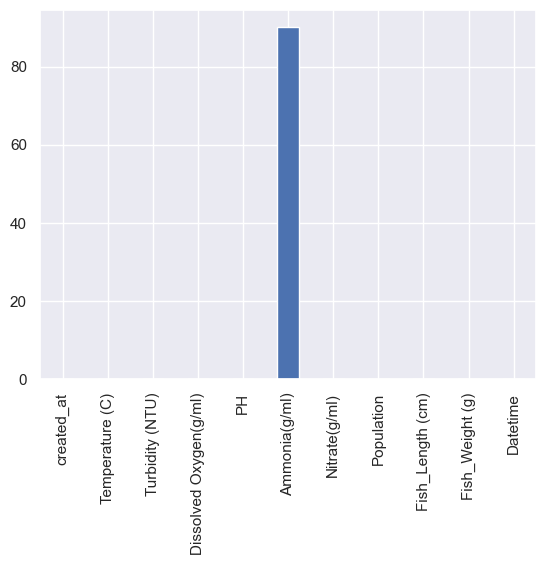

In [7]:
df.isna().sum().plot.bar()

In [8]:
df = df.dropna()

<AxesSubplot:>

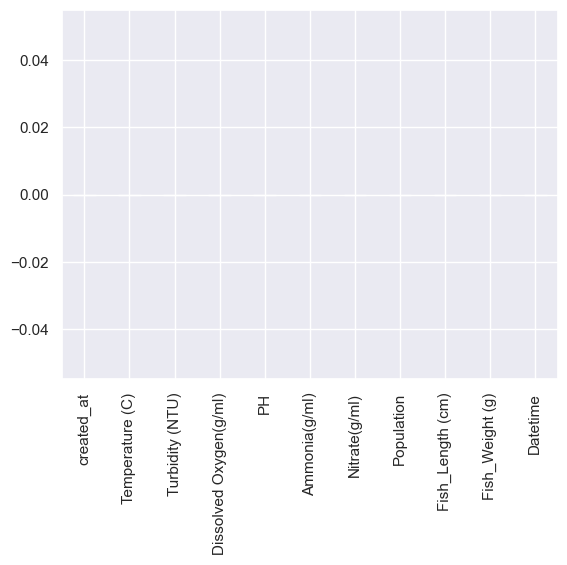

In [9]:
df.isna().sum().plot.bar()

In [10]:
df.dtypes

created_at                        object
Temperature (C)                  float64
Turbidity (NTU)                    int64
Dissolved Oxygen(g/ml)           float64
PH                               float64
Ammonia(g/ml)                    float64
Nitrate(g/ml)                      int64
Population                         int64
Fish_Length (cm)                 float64
Fish_Weight (g)                  float64
Datetime                  datetime64[ns]
dtype: object

In [11]:
dfdaily = df.copy()
dfdaily.set_index('Datetime')

,created_at,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g)
Datetime,,,,,,,,,,
2021-06-19 00:00:05,2021-06-19 00:00:05 CET,24.8750,100,4.505,8.43365,0.38000,193,50,6.96,3.36
2021-06-19 00:01:02,2021-06-19 00:01:02 CET,24.9375,100,6.601,8.43818,0.38000,194,50,6.96,3.36
2021-06-19 00:01:22,2021-06-19 00:01:22 CET,24.8750,100,15.797,8.42457,0.38000,192,50,6.96,3.36
2021-06-19 00:01:44,2021-06-19 00:01:44 CET,24.9375,100,5.046,8.43365,0.38000,193,50,6.96,3.36
2021-06-19 00:02:07,2021-06-19 00:02:07 CET,24.9375,100,38.407,8.40641,0.38000,192,50,6.96,3.36
...,...,...,...,...,...,...,...,...,...,...
2021-10-31 04:31:10,2021-10-31 04:31:10 CET,26.0625,52,8.094,-1.83008,57135.59766,981,50,35.39,394.66
2021-10-31 04:31:58,2021-10-31 04:31:58 CET,26.1250,54,10.234,-1.83462,47314.63672,979,50,35.39,394.66
2021-10-31 04:32:19,2021-10-31 04:32:19 CET,26.0625,54,4.904,-1.82554,54835.34375,979,50,35.39,394.66


In [12]:
dfdaily = dfdaily.resample('D', on='Datetime').mean()

/var/folders/bs/8t6g_kqj3d374551vpd7cvrw0000gn/T/ipykernel_17698/3653149318.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfdaily = dfdaily.resample('D', on='Datetime').mean()


In [13]:
dfdaily

,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g)
Datetime,,,,,,,,,
2021-06-19,25.428088,100.000000,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36
2021-06-20,25.948557,100.000000,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06
2021-06-21,25.349366,100.000000,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76
2021-06-22,25.055735,100.000000,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46
2021-06-23,24.505092,100.000000,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16
...,...,...,...,...,...,...,...,...,...
2021-10-27,25.300742,70.086057,18.345900,-1.845440,7.387274e+08,1046.291194,50.0,35.11,380.38
2021-10-28,25.638997,55.569475,34.954299,-1.879320,3.089474e+09,875.592757,50.0,35.18,383.95
2021-10-29,25.663215,55.752646,28.032436,-1.877371,1.986513e+02,1073.905423,50.0,35.25,387.52


In [14]:
dfdaily['Fish_L_Delta'] = dfdaily['Fish_Length (cm)'].diff()
dfdaily['Fish_W_Delta'] = dfdaily['Fish_Weight (g)'].diff()
dfdaily

,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Population,Fish_Length (cm),Fish_Weight (g),Fish_L_Delta,Fish_W_Delta
Datetime,,,,,,,,,,,
2021-06-19,25.428088,100.000000,12.458182,8.404279,1.151256e+07,201.838762,50.0,6.96,3.36,NaN,NaN
2021-06-20,25.948557,100.000000,12.937845,8.393613,3.800000e-01,184.574415,50.0,7.31,4.06,0.35,0.70
2021-06-21,25.349366,100.000000,9.287424,8.405416,3.800000e-01,172.322064,50.0,7.66,4.76,0.35,0.70
2021-06-22,25.055735,100.000000,9.776551,8.333842,8.082028e+05,151.653780,50.0,8.01,5.46,0.35,0.70
2021-06-23,24.505092,100.000000,7.238285,8.325194,1.107521e+06,146.988419,50.0,8.36,6.16,0.35,0.70
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,25.300742,70.086057,18.345900,-1.845440,7.387274e+08,1046.291194,50.0,35.11,380.38,0.07,3.57
2021-10-28,25.638997,55.569475,34.954299,-1.879320,3.089474e+09,875.592757,50.0,35.18,383.95,0.07,3.57
2021-10-29,25.663215,55.752646,28.032436,-1.877371,1.986513e+02,1073.905423,50.0,35.25,387.52,0.07,3.57


<AxesSubplot:>

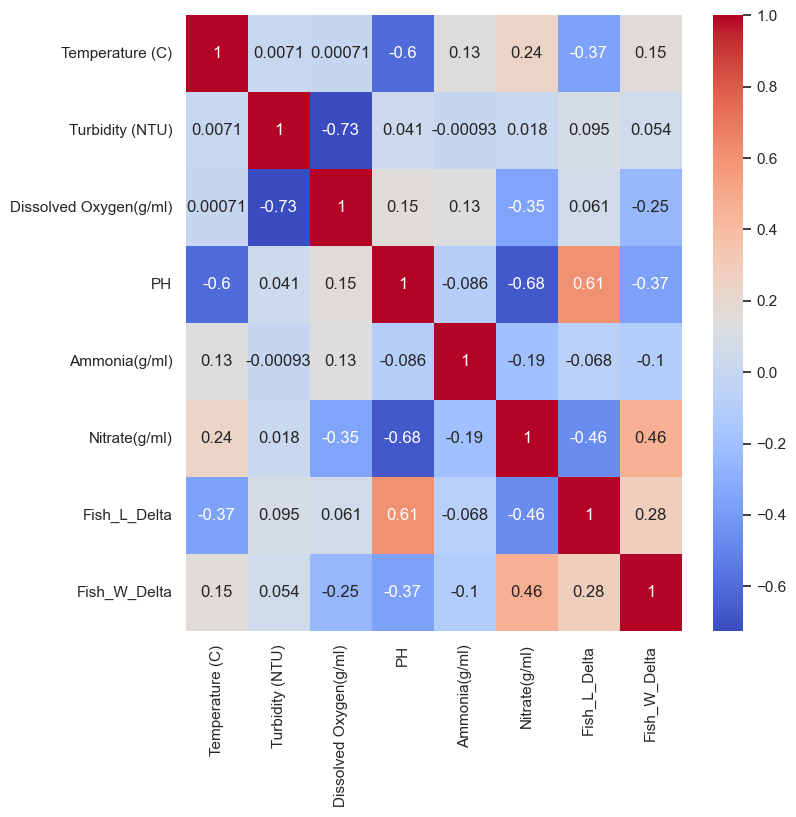

In [15]:
dfplot = dfdaily[['Temperature (C)', 'Turbidity (NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)', 'Fish_L_Delta', 'Fish_W_Delta']]
dfplot.corr()
plt.figure(figsize=(8,8))
sns.heatmap(dfplot.corr(), annot=True, cmap='coolwarm')

In [16]:
dfdaily1 = dfdaily[['Temperature (C)', 'Turbidity (NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)']]
dfdaily2 = dfdaily[['Fish_L_Delta', 'Fish_W_Delta']]
dfdaily1 = dfdaily1.iloc[:-1,:]
dfdaily2 = dfdaily2.iloc[1:,:]
array = dfdaily2['Fish_W_Delta'].to_numpy()
array

array([0.7       , 0.7       , 0.7       , 0.7       , 0.7       ,
       0.7       ,        nan,        nan,        nan, 0.7       ,
       0.7       , 0.7       , 0.7       , 0.64      , 0.89      ,
       0.89      , 0.89      , 0.89      , 0.89      , 0.89      ,
       0.89      , 0.89      , 0.89      , 0.89      , 0.89      ,
       0.89      , 0.89      , 0.83      , 1.5       , 1.5       ,
       1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
       1.5       , 1.5       , 1.5       , 1.5       , 1.5       ,
       1.5       , 1.5       , 1.46      , 1.46      , 1.46      ,
       1.46      , 1.46      , 1.46      , 1.46      , 1.46      ,
       1.46      , 1.37      , 1.55      , 1.46      , 1.46      ,
       1.52      , 3.6       , 3.6       , 3.6       , 3.6       ,
              nan,        nan, 3.6       , 3.6       , 3.6       ,
              nan,        nan,        nan,        nan, 3.6       ,
       3.1       , 3.1       , 3.1       , 3.1       ,        

In [17]:
dfdaily1['Fish_W_Delta'] = array
dfdaily1

,Temperature (C),Turbidity (NTU),Dissolved Oxygen(g/ml),PH,Ammonia(g/ml),Nitrate(g/ml),Fish_W_Delta
Datetime,,,,,,,
2021-06-19,25.428088,100.000000,12.458182,8.404279,1.151256e+07,201.838762,0.70
2021-06-20,25.948557,100.000000,12.937845,8.393613,3.800000e-01,184.574415,0.70
2021-06-21,25.349366,100.000000,9.287424,8.405416,3.800000e-01,172.322064,0.70
2021-06-22,25.055735,100.000000,9.776551,8.333842,8.082028e+05,151.653780,0.70
2021-06-23,24.505092,100.000000,7.238285,8.325194,1.107521e+06,146.988419,0.70
...,...,...,...,...,...,...,...
2021-10-26,25.366049,93.392590,4.660648,-0.439943,3.665877e+09,979.553972,3.57
2021-10-27,25.300742,70.086057,18.345900,-1.845440,7.387274e+08,1046.291194,3.57
2021-10-28,25.638997,55.569475,34.954299,-1.879320,3.089474e+09,875.592757,3.57


In [18]:
#setup a printing function for print one month result for easy understanding
def testdata_plot(df):
    plt.figure(figsize=(15,2))
    plt.plot(df.loc['2021-10'].index, df.loc['2021-10','Fish_W_Delta'], '-g', alpha=0.6, label='Fish Length')
    plt.plot(df.loc['2021-10'].index, df.loc['2021-10','Fish_W_Delta_pred'], '--r', alpha=0.8, label='Fish Length Prediction')
    plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.5))
    plt.show() 
    print("*******************************************************************************************************************")
    status = True
    return None

/Users/Arcpolar/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.03383e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Model: Linear regression Ridge
R²: -7.7296
Mean Absolute Error: 3.505


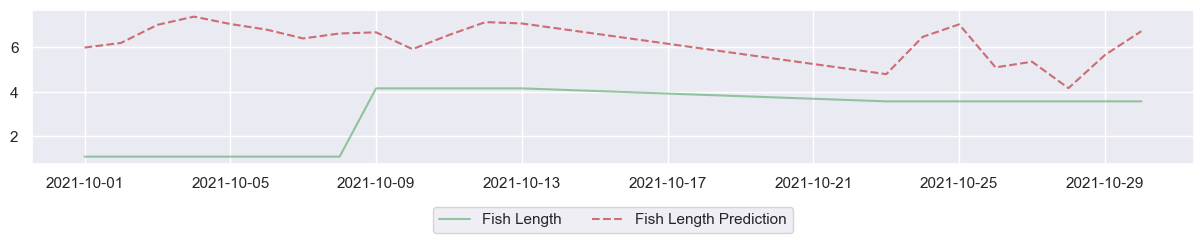

*******************************************************************************************************************
Model: LGBM
R²: -0.8889
Mean Absolute Error: 1.3794


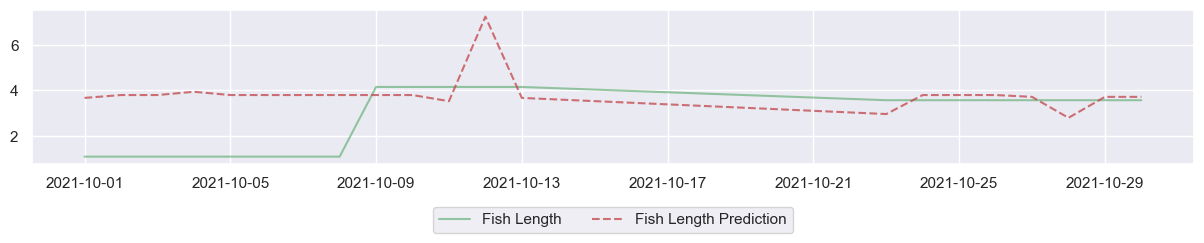

*******************************************************************************************************************


In [19]:
dfdaily1 = dfdaily1.dropna()
#make feature variables list
featurelist = ['Temperature (C)', 'Turbidity (NTU)', 'Dissolved Oxygen(g/ml)', 'PH', 'Ammonia(g/ml)', 'Nitrate(g/ml)']
#set training data from Jan 2013 to Oct 2013
traindata = dfdaily1.loc['2021-06':'2021-09'].copy()
#set test data from Nov 2013 to Feb 2014
testdata = dfdaily1.loc['2021-10':].copy()
#Ridge Model Training and testing
Ridge_model = Ridge()
Ridge_model.fit(traindata[featurelist], traindata['Fish_W_Delta'])
testdata['Fish_W_Delta_pred'] = Ridge_model.predict(testdata[featurelist])
errors = abs(testdata['Fish_W_Delta_pred'] - testdata['Fish_W_Delta'])
RSQUARED = r2_score(testdata['Fish_W_Delta'], testdata['Fish_W_Delta_pred'])
MAE = mean_absolute_error(testdata['Fish_W_Delta'], testdata['Fish_W_Delta_pred'])
#plot month of December
print("Model: Linear regression Ridge")
print("R\u00B2: "+str(round(RSQUARED,4)))
print("Mean Absolute Error: "+str(round(MAE,4)))
testdata_plot(testdata)
#LGBM traing and testing
LGB_model = lgb.LGBMRegressor()
LGB_model.fit(traindata[featurelist], traindata['Fish_W_Delta'])
testdata['Fish_W_Delta_pred'] = LGB_model.predict(testdata[featurelist])
errors = abs(testdata['Fish_W_Delta_pred'] - testdata['Fish_W_Delta'])
RSQUARED = r2_score(testdata['Fish_W_Delta'], testdata['Fish_W_Delta_pred'])
MAE = mean_absolute_error(testdata['Fish_W_Delta'], testdata['Fish_W_Delta_pred'])
#plot month of December
print("Model: LGBM")
print("R\u00B2: "+str(round(RSQUARED,4)))
print("Mean Absolute Error: "+str(round(MAE,4)))
testdata_plot(testdata)

In [50]:
X_train = traindata[featurelist]
y_train = traindata['Fish_W_Delta']
X_test = testdata[featurelist]
arrays = []
labs = []

from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the scaler on your training data
scaler.fit(X_train)

# Normalize the training data
X_train_norm = scaler.transform(X_train)
# Normalize the testing data using the same scaler
X_test_norm = scaler.transform(X_test)

for i in range(0,len(traindata)):
    arrays.append(X_train_norm[i])
    labs.append(traindata['Fish_W_Delta'].iloc[i])
arrays = np.array(arrays, dtype = object).astype(np.float32)
labs = np.array(labs, dtype = object).astype(np.float32)
arrays.shape
print(arrays)

[[7.94862509e-01 1.00000000e+00 3.09496194e-01 9.99870598e-01
  4.53592511e-03 7.64163509e-02]
 [1.00000000e+00 1.00000000e+00 3.22123826e-01 9.98656869e-01
  1.47063958e-11 6.07565455e-02]
 [7.63835192e-01 1.00000000e+00 2.26022750e-01 1.00000000e+00
  1.47063958e-11 4.96429279e-02]
 [6.48103356e-01 1.00000000e+00 2.38899499e-01 9.91855323e-01
  3.18430073e-04 3.08955479e-02]
 [4.31073278e-01 1.00000000e+00 1.72077060e-01 9.90871310e-01
  4.36360715e-04 2.66637839e-02]
 [4.02373821e-01 1.00000000e+00 3.35479766e-01 9.79681432e-01
  3.91221941e-02 2.65339743e-02]
 [6.42463505e-01 1.00000000e+00 3.22890610e-01 9.48695719e-01
  4.63943034e-01 1.02831665e-02]
 [4.64125812e-01 1.00000000e+00 1.85957804e-01 9.44241881e-01
  4.51979786e-02 6.48744591e-03]
 [4.79413569e-01 1.00000000e+00 3.10740262e-01 9.38210249e-01
  2.53391445e-01 9.96141043e-03]
 [6.70943499e-01 1.00000000e+00 3.14835042e-01 9.33456898e-01
  4.36318666e-01 1.58283208e-02]
 [7.40955412e-01 1.00000000e+00 3.52603555e-01 9.2

In [51]:
model_path = 'CNN_model1.h5'
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
#arrays = np.reshape(arrays, (81,6,1))
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# define the model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')


print(model.summary())

# fit the network
history = model.fit(arrays, labs, epochs=50, batch_size=16, validation_split=0.05, verbose=2, callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min'),keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])
# list all data in history
print(history.history.keys())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                84        
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
5/5 - 1s - loss: 12.2229 - val_loss: 1.0331 - 735ms/epoch - 147ms/step
Epoch 2/50
5/5 - 0s - loss: 11.9909 - val_loss: 0.9424 - 99ms/epoch - 20ms/step
Epoch 3/50
5/5 - 0s - loss: 11.7841 - val_loss: 0.8514 - 129ms/epoch - 26ms/step
Epoch 4/50
5/5 - 0s - loss: 11.5526 - val_loss: 0.7670 - 140ms/epoch - 2

In [53]:
val_arrays = []
val_labs = []
len(X_train)
for i in range(0,len(testdata)):
    val_arrays.append(X_test_norm[i])
    val_labs.append(testdata['Fish_W_Delta'].iloc[i])
val_arrays = np.array(val_arrays, dtype = object).astype(np.float32)
val_labs = np.array(val_labs, dtype = object).astype(np.float32)
val_arrays.shape

(21, 6)

In [54]:
scores_test = model.evaluate(val_arrays, val_labs, verbose=2)
print('\nMSE: {}'.format(scores_test))

1/1 - 0s - loss: 2.1308 - 30ms/epoch - 30ms/step

MSE: 2.13076114654541


1/1 [==============================] - 0s 159ms/step


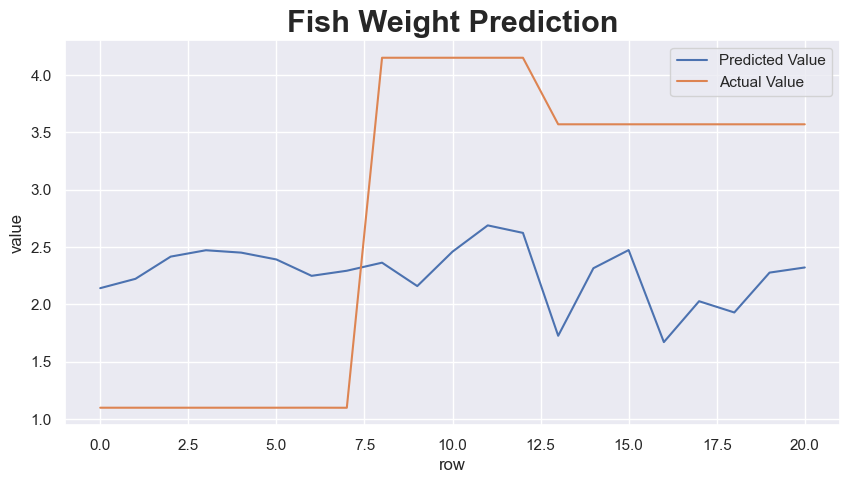

[1.1       1.1       1.1       1.1       1.1       1.1       1.1003021
 1.0996978 4.15      4.15      4.15      4.15      4.15      3.57
 3.57      3.57      3.57      3.57      3.57      3.57      3.57     ]
[[2.1419647]
 [2.2233012]
 [2.4168768]
 [2.4723291]
 [2.4517062]
 [2.3921008]
 [2.249292 ]
 [2.2937222]
 [2.3640323]
 [2.160106 ]
 [2.4600604]
 [2.689087 ]
 [2.6235697]
 [1.7270281]
 [2.3157816]
 [2.4737756]
 [1.6718194]
 [2.0280719]
 [1.9300619]
 [2.277428 ]
 [2.3222303]]


In [55]:
y_pred_test = model.predict(val_arrays)
y_true_test = val_labs
fig_verify = plt.figure(figsize=(10, 5))
plt.plot(y_pred_test, label = 'Predicted Value')
plt.plot(y_true_test, label = 'Actual Value')
plt.title('Fish Weight Prediction', fontsize=22, fontweight='bold')
plt.ylabel('value')
plt.xlabel('row')
plt.legend()
plt.show()
print(y_true_test)
print(y_pred_test)